In [1]:
import sys
sys.path.append('/home/lldddv/Documentos/UdeA/Trabajo_de_grado/kerrpy/src')

In [2]:
%reload_ext autoreload
%autoreload 2

import relatipy.numeric as rn
import relatipy.symbolic as rs

import numpy as np
import matplotlib.pyplot as plt

# Simbólico

## Métricas

Los paquetes simbólicos tienen empaquetadas las métricas para no tener que volver a escribirlas cada vez que se necesiten. Depende de `einsteinpy` y `sympy`.

In [3]:
kerr_sb = rs.metrics.Kerr()
kerr_sb.metric().tensor()

[[-R_s/(x^1*(a**2*cos(x^2)**2/x^1**2 + 1)) + 1, 0, 0, R_s*a*sin(x^2)**2/(x^1*(a**2*cos(x^2)**2/x^1**2 + 1))], [0, -(a**2*cos(x^2)**2/x^1**2 + 1)/(1 - (R_s*x^1 + a**2)/x^1**2), 0, 0], [0, 0, -x^1**2*(a**2*cos(x^2)**2/x^1**2 + 1), 0], [R_s*a*sin(x^2)**2/(x^1*(a**2*cos(x^2)**2/x^1**2 + 1)), 0, 0, (-R_s*a**2*sin(x^2)**2/(x^1*(a**2*cos(x^2)**2/x^1**2 + 1)) - a**2 - x^1**2)*sin(x^2)**2]]

## Numerico

### Definición de Métricas

Usamos la métrica de Schwarzschild y la de Kerr. Partimos de la métrica de Kerr y tomamos el límite cuando el parámetro de giro es cero.

In [ ]:
mass = 1
a = 0.0

sch_from_kerr = rn.metrics.Kerr(mass=mass, a=0.0)
sch = rn.metrics.Schwarzschild(mass=mass)

Declaramos una métrica de Kerr con parámetro de giro 0.5.

In [5]:
mass = 1
a = 0.5

kerr = rn.metrics.Kerr(mass=mass, a=a)

### Definición de partículas

Veamos una partícula en órbita circular alrededor del agujero negro. Como Rs depende unicamente de la masa, es el mismo para los 3 objetos. Lo haremos a 4Rs.

In [6]:
Rs = kerr.R_s
x1 = 4*Rs

# Partícula en esféricas
particle_sph = rn.coordinates.Spherical(
    xs = [0, x1, np.pi/2, 0], 
    vels = [ 0, 0, np.sqrt(1/x1)]
)

# Particula en Boyer-Lindquist para a=0.0
particle_bl_sch_from_kerr = particle_sph.convert_to("BoyerLindquist", a=0.0)

# Particula en Boyer-Lindquist para a=0.5
particle_bl_kerr = particle_sph.convert_to("BoyerLindquist", a=0.5)

### Paths

In [7]:
# Periodo y tiempos de integración
P = 1*2*np.pi*np.sqrt(x1**3)
taus = np.linspace(0, P, 1000)

In [8]:
# El sistema propio es esféricas para sch
path_sch = sch.geodesic.get_path(
    particle_sph, taus
)
# El sistema propio es Boyer-Lindquist para kerr y sch_from_kerr
path_sch_from_kerr = sch_from_kerr.geodesic.get_path(
    particle_bl_sch_from_kerr, taus
)
path_kerr = kerr.geodesic.get_path(
    particle_bl_kerr, taus
)

Como retorna en las coordenadas propias asociadas a cada métrica, hay que convertirlo a cartesianas para graficar.

In [9]:
xs_sch_from_kerr = path_sch_from_kerr.convert_to("Cartesian")
xs_sch = path_sch.convert_to("Cartesian")
xs_kerr = path_kerr.convert_to("Cartesian")

In [10]:
xs_kerr[:,1]

array([ 0.00000000e+00,  7.99975804e+00,  6.31184755e-02,  4.88901460e-16,
       -2.22370135e-02,  2.82834035e+00, -1.25355648e-18])

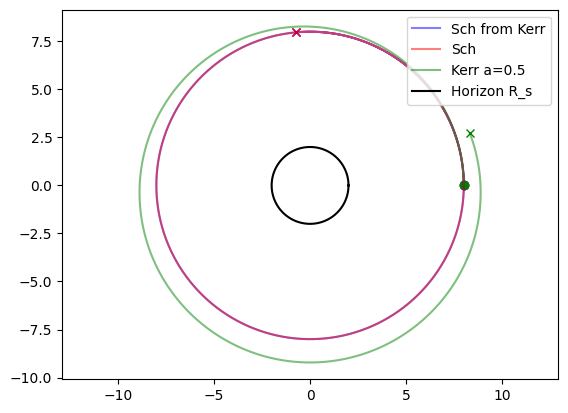

In [11]:
# inicio y final
plt.plot(xs_sch_from_kerr[1,0], xs_sch_from_kerr[2,0], 'ob', )
plt.plot(xs_sch_from_kerr[1,-1], xs_sch_from_kerr[2,-1], 'xb', )
plt.plot(xs_sch[1,0], xs_sch[2,0], 'or', )
plt.plot(xs_sch[1,-1], xs_sch[2,-1], 'xr', )
plt.plot(xs_kerr[1,0], xs_kerr[2,0], 'og', )
plt.plot(xs_kerr[1,-1], xs_kerr[2,-1], 'xg', )
# Paths
plt.plot(xs_sch_from_kerr[1], xs_sch_from_kerr[2], '-b', alpha=0.5, label="Sch from Kerr")
plt.plot(xs_sch[1], xs_sch[2], '-r', alpha=0.5, label="Sch")
plt.plot(xs_kerr[1], xs_kerr[2], '-g', alpha=0.5, label="Kerr a=0.5")

thetas = np.linspace(0, 2*np.pi, 100)
Rs = kerr.R_s
plt.plot(Rs*np.cos(thetas), Rs*np.sin(thetas), color="black", label="Horizon R_s")  # Horizon

# on top right
plt.legend(loc="upper right")
plt.axis("equal")

plt.show()

In [12]:
def plot_blackhole(ax, Rs):
    thetas = np.linspace(0, 2*np.pi, 100)
    ax.plot(Rs*np.cos(thetas), Rs*np.sin(thetas), color="black")  # Horizon
    ax.fill_between(Rs*np.cos(thetas), Rs*np.sin(thetas), color="black")

def plot_trajectory(ax, xs, label, color='blue'):
    ax.plot(xs[1], xs[2], '-', alpha=0.5, label=label, color=color)
    ax.plot(xs[1,0], xs[2,0], 'o', color=color)
    ax.plot(xs[1,-1], xs[2,-1], 'x', color=color)

In [13]:
def plot_any_coordinate_vs_time(ax, taus, xs, label, color='green'):
    ax.plot(taus, xs, '-', alpha=1, label=label, color=color)

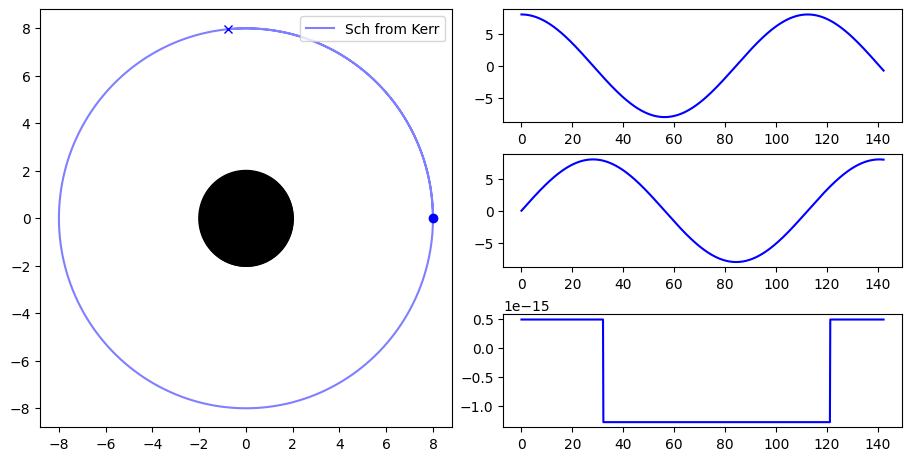

In [14]:
fig = plt.figure(layout="constrained", figsize=(9, 4.5))

gs0 = fig.add_gridspec(1, 2)


gs1 = gs0[0].subgridspec(1, 1)
ax1 = fig.add_subplot(gs1[0])

plot_blackhole(ax1, Rs)
plot_trajectory(ax1, xs_sch_from_kerr, "Sch from Kerr", color='blue')

gs2 = gs0[1].subgridspec(3, 1)

axs = []

for ss in gs2:
    ax = fig.add_subplot(ss)
    axs.append(ax)
    ax.set_title("")
    ax.set_xlabel("")

plot_any_coordinate_vs_time(axs[0], taus, xs_sch_from_kerr[1,:], "r (Sch from Kerr)", color='blue')
plot_any_coordinate_vs_time(axs[1], taus, xs_sch_from_kerr[2,:], "theta (Sch from Kerr)", color='blue')
plot_any_coordinate_vs_time(axs[2], taus, xs_sch_from_kerr[3,:], "phi (Sch from Kerr)", color='blue')

ax1.legend(loc="upper right")


In [15]:
xs_sch_from_kerr[1,:]

array([ 8.        ,  7.99974683,  7.99898735,  7.9977216 ,  7.99594965,
        7.99367164,  7.99088768,  7.98759798,  7.98380272,  7.97950215,
        7.97469655,  7.96938622,  7.96357149,  7.95725274,  7.95043036,
        7.94310478,  7.93527647,  7.92694592,  7.91811366,  7.90878025,
        7.89894628,  7.88861238,  7.87777919,  7.8664474 ,  7.85461774,
        7.84229094,  7.82946779,  7.8161491 ,  7.80233571,  7.7880285 ,
        7.77322838,  7.75793627,  7.74215315,  7.72588001,  7.7091179 ,
        7.69186786,  7.67413098,  7.6559084 ,  7.63720127,  7.61801076,
        7.5983381 ,  7.57818453,  7.55755132,  7.53643978,  7.51485124,
        7.49278708,  7.47024869,  7.44723749,  7.42375495,  7.39980254,
        7.37538179,  7.35049424,  7.32514146,  7.29932507,  7.27304668,
        7.24630798,  7.21911064,  7.19145639,  7.16334699,  7.1347842 ,
        7.10576984,  7.07630575,  7.04639378,  7.01603584,  6.98523384,
        6.95398973,  6.9223055 ,  6.89018314,  6.85762468,  6.82